<a href="https://colab.research.google.com/github/NNRahat/PyTorch_projects/blob/main/dogs_and_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
from torch import nn
import os

## downloading the dataset from kaggle

In [ ]:
#upload the kaggle json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## data_path

In [ ]:
from pathlib import Path
data_path = Path("dogs_vs_cats")
data_path

PosixPath('dogs_vs_cats')

## extracting the .zip file

In [ ]:
if data_path.is_dir():
  print(f"directory {data_path} already exists")
else:
  # unzip the file
  import zipfile
  zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
  zip_ref.extractall('/content')
  zip_ref.close()

In [ ]:
!ls

dogs_vs_cats	  going_moduler  sample_data  train
dogs-vs-cats.zip  kaggle.json	 test


## train and test dir

In [ ]:
train_dir = data_path / "train"
test_dir = data_path / "test"

In [ ]:
!apt install subversion
!svn checkout https://github.com/NNRahat/PyTorch_helper_scripts/trunk/going_moduler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 libutf8proc2 subversion
0 upgraded, 6 newly installed, 0 to remove and 13 not upgraded.
Need to get 2,355 kB of archives.
After this operation, 10.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libapr1 amd64 1.6.5-1ubuntu1 [91.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libaprutil1 amd64 1.6.1-4ubuntu2.1 [84.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libserf-1-1 amd64 1.3.9-8build1 [45.2 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libutf8proc2 amd64 2.5.0-1 [50.0 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-

## transform

### transform `with trivial augmentation`

In [ ]:
transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

#### train and test dataloader

In [ ]:
from going_moduler import data_setup, multiclass_predictions, binary_predictions, multiclass_engine, binary_engine, plot_the_results

BATCH_SIZE = 32
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = transform,
    batch_size= BATCH_SIZE,
    num_workers = os.cpu_count()
)

### transform `without` the `trivial-augmentation`

In [ ]:
transform_without_trivial = transforms.Compose([
    transforms.Resize(size = (224, 224)),
    transforms.ToTensor()
])

#### train and test

In [ ]:
from going_moduler import data_setup, multiclass_predictions, binary_predictions, multiclass_engine, binary_engine, plot_the_results

BATCH_SIZE = 32
train_dataloader_without, test_dataloader_without, class_names = data_setup.create_dataloaders(
    train_dir = train_dir,
    test_dir = test_dir,
    transform = transform_without_trivial,
    batch_size= BATCH_SIZE,
    num_workers = os.cpu_count()
)

## model class creation with only `BatchNorm2d()` and `conv_block_3` for `model_0`

* max came (with 10 epoch) = `81` - `with` trivial augment  

* max came with (`transform_without_trivial`, `10 epoch`)  - `81.529%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*28*28,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))


In [ ]:
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr = 0.001)

### binary_engine

In [ ]:
# hyper parameters
EPOCHS = 5

model_0_results = binary_engine.Binary_engine(model = model_0,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.30091, train acc: 87.410% | test loss: 0.41853, test_acc: 81.529%

Epoch: 2
----------------
train loss: 0.29943, train acc: 87.555% | test loss: 0.41949, test_acc: 81.369%

Epoch: 3
----------------
train loss: 0.29961, train acc: 87.185% | test loss: 0.41877, test_acc: 81.549%

Epoch: 4
----------------
train loss: 0.29844, train acc: 87.385% | test loss: 0.41667, test_acc: 81.648%

Epoch: 5
----------------
train loss: 0.30133, train acc: 87.405% | test loss: 0.41794, test_acc: 81.529%


## model class creation with only BatchNorm2d() and conv_block_3 and 3 linear layers (`no dropouts`) for `model_1`
max came (with 10 epoch) = `79`~`80`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*28*28,
                  out_features = 128),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))


In [ ]:
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 5

model_1_results = binary_engine.Binary_engine(model = model_1,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.30851, train acc: 86.995% | test loss: 0.38102, test_acc: 83.141%

Epoch: 2
----------------
train loss: 0.30767, train acc: 87.105% | test loss: 0.38092, test_acc: 83.021%

Epoch: 3
----------------
train loss: 0.30864, train acc: 86.905% | test loss: 0.38151, test_acc: 83.101%

Epoch: 4
----------------
train loss: 0.30683, train acc: 87.165% | test loss: 0.38181, test_acc: 82.982%

Epoch: 5
----------------
train loss: 0.30947, train acc: 86.950% | test loss: 0.38112, test_acc: 83.081%


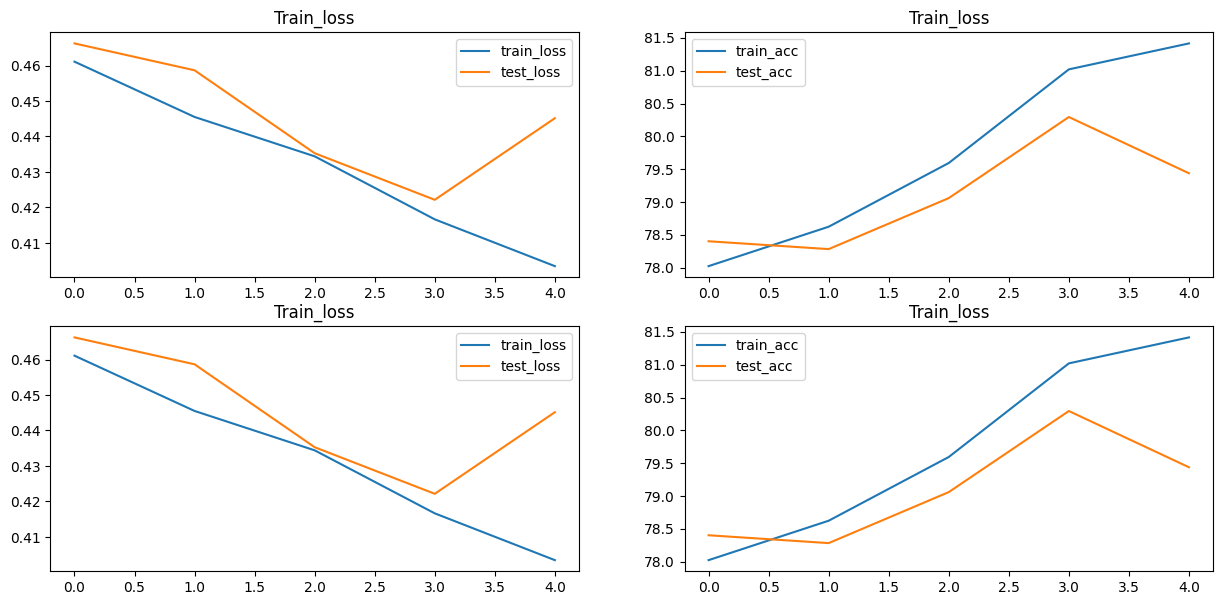

In [ ]:
from going_moduler import plot_the_results
plot_the_results.plot_curves(model_0 = model_0_results,
                             model_1 = model_1_results)

## model class creation with only BatchNorm2d() and conv_block_3 (`with dropouts`) for `model_6`
* with (`epoch 10`) = ``

* max came with (`transform_without_trivial`, `10 epoch`)  - ` 83.897`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*28*28,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_3(self.conv_block_2(self.conv_block_1(x))))


In [ ]:
model_6 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_6.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_6_results = binary_engine.Binary_engine(model = model_6,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.62294, train acc: 67.215% | test loss: 0.52605, test_acc: 74.064%

Epoch: 2
----------------
train loss: 0.48927, train acc: 76.525% | test loss: 0.47692, test_acc: 76.871%

Epoch: 3
----------------
train loss: 0.42707, train acc: 80.485% | test loss: 0.45691, test_acc: 79.896%

Epoch: 4
----------------
train loss: 0.39250, train acc: 82.515% | test loss: 0.44518, test_acc: 79.996%

Epoch: 5
----------------
train loss: 0.35862, train acc: 84.265% | test loss: 0.40279, test_acc: 82.604%

Epoch: 6
----------------
train loss: 0.32960, train acc: 85.920% | test loss: 0.37628, test_acc: 83.400%

Epoch: 7
----------------
train loss: 0.29627, train acc: 87.580% | test loss: 0.42985, test_acc: 81.449%

Epoch: 8
----------------
train loss: 0.27631, train acc: 88.160% | test loss: 0.39279, test_acc: 82.922%

Epoch: 9
----------------
train loss: 0.25444, train acc: 89.315% | test loss: 0.40289, test_acc: 83.240%

Epoch: 10
----------------
train los

## model class creation with only `BatchNorm2d()` and `conv_block_4` for `model_2`
* max came (with 10 epoch) = `80`

* max came with (`transform_without_trivial`, `10 epoch`)  - `87.321`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.conv_block_4(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_2 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_2.parameters(),
                             lr = 0.001)

### binary_engine

In [ ]:
# hyper parameters
EPOCHS = 10

model_2_results = binary_engine.Binary_engine(model = model_2,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.59541, train acc: 68.280% | test loss: 0.49089, test_acc: 76.553%

Epoch: 2
----------------
train loss: 0.48325, train acc: 77.045% | test loss: 0.51610, test_acc: 75.597%

Epoch: 3
----------------
train loss: 0.43650, train acc: 79.895% | test loss: 0.48786, test_acc: 77.269%

Epoch: 4
----------------
train loss: 0.39956, train acc: 81.885% | test loss: 0.39203, test_acc: 83.400%

Epoch: 5
----------------
train loss: 0.35893, train acc: 84.195% | test loss: 0.36155, test_acc: 83.857%

Epoch: 6
----------------
train loss: 0.32211, train acc: 86.285% | test loss: 0.43285, test_acc: 81.389%

Epoch: 7
----------------
train loss: 0.29744, train acc: 87.445% | test loss: 0.32340, test_acc: 86.584%

Epoch: 8
----------------
train loss: 0.27654, train acc: 88.250% | test loss: 0.39026, test_acc: 84.375%

Epoch: 9
----------------
train loss: 0.25620, train acc: 89.410% | test loss: 0.33341, test_acc: 87.162%

Epoch: 10
----------------
train los

## prediction of a `random image`

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(
    model: torch.nn.Module,
    class_names: List[str],
    image_path: str,
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
    device: torch.device = device,
):
    # Open image
    img = Image.open(image_path)

    # Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    ### Predict on image ###

    # Make sure the model is on the target device
    model.to(device)

    # Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
        transformed_image = image_transform(img).unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(transformed_image.to(device))

    # Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.sigmoid(target_image_pred)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.round(target_image_pred_probs).type(torch.int64).item()
    # Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(
        f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}"
    )
    plt.axis(False)

In [ ]:
!wget https://images.unsplash.com/photo-1592769606534-fe78d27bf450
!cp photo-1592769606534-fe78d27bf450 dog2.jpg

--2023-06-19 17:50:35--  https://images.unsplash.com/photo-1592769606534-fe78d27bf450
Resolving images.unsplash.com (images.unsplash.com)... 146.75.78.208, 2a04:4e42:84::720
Connecting to images.unsplash.com (images.unsplash.com)|146.75.78.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7689149 (7.3M) [image/jpeg]
Saving to: ‘photo-1592769606534-fe78d27bf450’

photo-1592769606534 100%[===================>]   7.33M  --.-KB/s    in 0.08s   

2023-06-19 17:50:35 (86.4 MB/s) - ‘photo-1592769606534-fe78d27bf450’ saved [7689149/7689149]



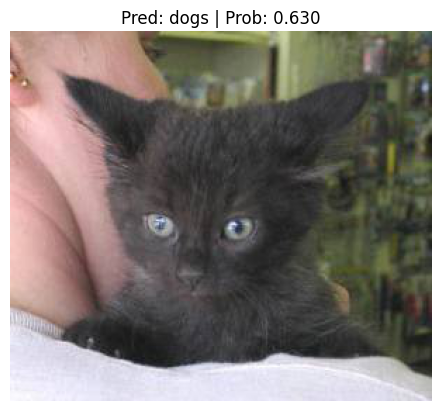

In [ ]:
IMAGE_PATH = "/content/cat.jpg"
from going_moduler import binary_predictions
pred_and_plot_image(model = model_1,
                                class_names = class_names,
                                image_path = IMAGE_PATH,
                                device = device)

## model class creation with only BatchNorm2d() and conv_block_4 (`no dropouts`) for `model_4`

* max came (with 10 epoch) = `83`
 but with (with 15 epoch) = `85 ~ 86`

* max came with (`transform_without_trivial`, `10 epoch`)  - `86.823`


In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_4 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_4.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_4_results = binary_engine.Binary_engine(model = model_4,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.56456, train acc: 70.375% | test loss: 0.51856, test_acc: 74.084%

Epoch: 2
----------------
train loss: 0.47821, train acc: 76.975% | test loss: 0.46409, test_acc: 78.045%

Epoch: 3
----------------
train loss: 0.42895, train acc: 80.085% | test loss: 0.43340, test_acc: 79.538%

Epoch: 4
----------------
train loss: 0.39321, train acc: 82.645% | test loss: 0.38897, test_acc: 83.420%

Epoch: 5
----------------
train loss: 0.35801, train acc: 84.130% | test loss: 0.39304, test_acc: 82.783%

Epoch: 6
----------------
train loss: 0.32563, train acc: 85.745% | test loss: 0.37471, test_acc: 83.181%

Epoch: 7
----------------
train loss: 0.30240, train acc: 87.205% | test loss: 0.32937, test_acc: 86.047%

Epoch: 8
----------------
train loss: 0.27879, train acc: 88.140% | test loss: 0.33974, test_acc: 86.127%

Epoch: 9
----------------
train loss: 0.26394, train acc: 88.815% | test loss: 0.31352, test_acc: 86.783%

Epoch: 10
----------------
train los

In [ ]:
from going_moduler import plot_the_results
plot_the_results.plot_curves(model_0 = model_0_results,
                             model_1 = model_1_results)

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) for `model_5`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `88.157`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_5 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_5.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_5_results = binary_engine.Binary_engine(model = model_5,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.58946, train acc: 68.635% | test loss: 0.51843, test_acc: 73.905%

Epoch: 2
----------------
train loss: 0.44937, train acc: 79.335% | test loss: 0.48776, test_acc: 75.796%

Epoch: 3
----------------
train loss: 0.38825, train acc: 82.670% | test loss: 0.37448, test_acc: 83.599%

Epoch: 4
----------------
train loss: 0.34895, train acc: 85.130% | test loss: 0.34586, test_acc: 85.291%

Epoch: 5
----------------
train loss: 0.31898, train acc: 86.275% | test loss: 0.38372, test_acc: 84.076%

Epoch: 6
----------------
train loss: 0.29042, train acc: 88.040% | test loss: 0.40109, test_acc: 83.161%

Epoch: 7
----------------
train loss: 0.27162, train acc: 88.735% | test loss: 0.30001, test_acc: 87.281%

Epoch: 8
----------------
train loss: 0.25211, train acc: 89.565% | test loss: 0.29188, test_acc: 87.898%

Epoch: 9
----------------
train loss: 0.23447, train acc: 90.210% | test loss: 0.33038, test_acc: 87.042%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `50` neurons for `model_7`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `93.471%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_7 = TinyVGG(input_shape = 3,
                  hidden_units = 50,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_7.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_7_results = binary_engine.Binary_engine(model = model_7,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.65840, train acc: 64.150% | test loss: 0.52457, test_acc: 73.229%

Epoch: 2
----------------
train loss: 0.49413, train acc: 76.030% | test loss: 0.49518, test_acc: 77.229%

Epoch: 3
----------------
train loss: 0.40312, train acc: 81.825% | test loss: 0.70298, test_acc: 68.650%

Epoch: 4
----------------
train loss: 0.32246, train acc: 86.250% | test loss: 0.30707, test_acc: 87.162%

Epoch: 5
----------------
train loss: 0.25026, train acc: 89.525% | test loss: 0.22515, test_acc: 90.665%

Epoch: 6
----------------
train loss: 0.18809, train acc: 92.380% | test loss: 0.19548, test_acc: 92.098%

Epoch: 7
----------------
train loss: 0.15745, train acc: 93.900% | test loss: 0.21140, test_acc: 92.496%

Epoch: 8
----------------
train loss: 0.12730, train acc: 95.080% | test loss: 0.21724, test_acc: 91.103%

Epoch: 9
----------------
train loss: 0.11499, train acc: 95.530% | test loss: 0.18249, test_acc: 92.018%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `80` neurons for `model_8`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `92.436%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_8 = TinyVGG(input_shape = 3,
                  hidden_units = 80,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_8.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_8_results = binary_engine.Binary_engine(model = model_8,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.75348, train acc: 60.370% | test loss: 0.58550, test_acc: 70.462%

Epoch: 2
----------------
train loss: 0.54042, train acc: 72.510% | test loss: 0.57222, test_acc: 71.238%

Epoch: 3
----------------
train loss: 0.46177, train acc: 78.110% | test loss: 0.47183, test_acc: 77.130%

Epoch: 4
----------------
train loss: 0.38305, train acc: 82.955% | test loss: 0.37552, test_acc: 83.400%

Epoch: 5
----------------
train loss: 0.29156, train acc: 87.540% | test loss: 0.41856, test_acc: 82.504%

Epoch: 6
----------------
train loss: 0.22255, train acc: 90.715% | test loss: 0.26003, test_acc: 88.794%

Epoch: 7
----------------
train loss: 0.18057, train acc: 92.815% | test loss: 0.26325, test_acc: 89.112%

Epoch: 8
----------------
train loss: 0.14499, train acc: 94.285% | test loss: 0.18350, test_acc: 92.257%

Epoch: 9
----------------
train loss: 0.12752, train acc: 94.990% | test loss: 0.20747, test_acc: 92.695%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `100` neurons for `model_9`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `93.133%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_9 = TinyVGG(input_shape = 3,
                  hidden_units = 100,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_9.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_9_results = binary_engine.Binary_engine(model = model_9,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.75441, train acc: 62.530% | test loss: 0.59570, test_acc: 70.681%

Epoch: 2
----------------
train loss: 0.54549, train acc: 72.575% | test loss: 0.52228, test_acc: 72.890%

Epoch: 3
----------------
train loss: 0.49085, train acc: 76.530% | test loss: 0.50451, test_acc: 76.035%

Epoch: 4
----------------
train loss: 0.42876, train acc: 80.110% | test loss: 0.43829, test_acc: 79.100%

Epoch: 5
----------------
train loss: 0.34669, train acc: 84.485% | test loss: 0.32227, test_acc: 86.266%

Epoch: 6
----------------
train loss: 0.26180, train acc: 89.215% | test loss: 0.27339, test_acc: 88.316%

Epoch: 7
----------------
train loss: 0.20005, train acc: 91.695% | test loss: 0.20666, test_acc: 91.640%

Epoch: 8
----------------
train loss: 0.16094, train acc: 93.580% | test loss: 0.19911, test_acc: 92.138%

Epoch: 9
----------------
train loss: 0.12895, train acc: 94.815% | test loss: 0.22791, test_acc: 92.078%

Epoch: 10
----------------
train los

## model class creation with only BatchNorm2d() and conv_block_4 (`with dropouts`) & `128` neurons for `model_10`
* with (`epoch 10`) = `85`

* max came with (`transform_without_trivial`, `10 epoch`)  - `90.287%`

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_3 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.conv_block_4 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  padding = 1,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.BatchNorm2d(num_features = hidden_units),
        nn.MaxPool2d(kernel_size = 2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*14*14,
                  out_features = 128),
        nn.Dropout(0.1),
        nn.Linear(in_features = 128,
                  out_features = 64),
        nn.Dropout(0.1),
        nn.Linear(in_features = 64,
                  out_features = output_shape)
    )

  def forward(self, x):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x = self.conv_block_3(x)
    # print(x.shape)
    # x = self.classifier(x)
    # return x

    return self.classifier(self.conv_block_4(self.conv_block_3(self.conv_block_2(self.conv_block_1(x)))))


In [ ]:
model_10 = TinyVGG(input_shape = 3,
                  hidden_units = 128,
                  output_shape = 1).to(device)

### loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params = model_10.parameters(),
                             lr = 0.001)

In [ ]:
# hyper parameters
EPOCHS = 10

model_10_results = binary_engine.Binary_engine(model = model_10,
                                train_dataloader = train_dataloader_without,
                                test_dataloader = test_dataloader_without,
                                loss_fn = loss_fn,
                                optimizer = optimizer,
                                device = device,
                                epochs = EPOCHS)

  0%|          | 0/10 [00:00<?, ?it/s]


Epoch: 1
----------------
train loss: 0.81653, train acc: 58.355% | test loss: 0.65064, test_acc: 63.973%

Epoch: 2
----------------
train loss: 0.55215, train acc: 71.475% | test loss: 0.51898, test_acc: 74.363%

Epoch: 3
----------------
train loss: 0.49659, train acc: 75.575% | test loss: 0.47660, test_acc: 76.334%

Epoch: 4
----------------
train loss: 0.42589, train acc: 80.225% | test loss: 0.45927, test_acc: 77.846%

Epoch: 5
----------------
train loss: 0.33913, train acc: 85.205% | test loss: 0.30119, test_acc: 87.321%

Epoch: 6
----------------
train loss: 0.24556, train acc: 89.750% | test loss: 0.27897, test_acc: 88.973%

Epoch: 7
----------------
train loss: 0.19017, train acc: 92.135% | test loss: 0.20360, test_acc: 92.197%

Epoch: 8
----------------
train loss: 0.15609, train acc: 93.645% | test loss: 0.20420, test_acc: 91.620%

Epoch: 9
----------------
train loss: 0.12641, train acc: 94.995% | test loss: 0.20261, test_acc: 93.252%

Epoch: 10
----------------
train los